# Airbnb Price Prediction Project

The goal of this project is to apply **data exploration** and **supervised machine learning techniques** to predict the **logarithm of Airbnb prices** based on listing features. Students will learn how to : 
- Explore and visualize complex datasets
- Perform data cleaning and feature engineering
- Train, evaluate, and compare ML models
- Generate predictions for a hidden test set

## 1. 🔍 Data Exploration

In [600]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_train = pd.read_csv('airbnb_train.csv')
df_test= pd.read_csv('airbnb_test.csv')

df_train.head()
# df_test.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5708593,4.317488,House,Private room,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",3,1.0,Real Bed,flexible,False,...,NaN,33.782712,-118.134410,Island style Spa Studio,Long Beach,0,NaN,90804,0.0,2.0
1,14483613,4.007333,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",4,2.0,Real Bed,strict,False,...,2017-09-17,40.705468,-73.909439,"Beautiful and Simple Room W/2 Beds, 25 Mins to...",Ridgewood,38,86.0,11385,1.0,2.0
2,10412649,7.090077,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",6,2.0,Real Bed,flexible,False,...,NaN,38.917537,-77.031651,2br/2ba luxury condo perfect for infant / toddler,U Street Corridor,0,NaN,20009,2.0,2.0
3,17954362,3.555348,House,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,Real Bed,flexible,True,...,2017-09-29,40.736001,-73.924248,Manhattan view from Queens. Lovely single room .,Sunnyside,19,96.0,11104,1.0,1.0
4,9969781,5.480639,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,moderate,True,...,2017-08-28,37.744896,-122.430665,Zen Captured Noe Valley House,Noe Valley,15,96.0,94131,2.0,2.0


### Present dataset structure (features, types, distributions)

In [601]:
print("Train Dataset Shape:", df_train.shape)
print("\ntrain Dataset Info:\n", df_train.info())

Train Dataset Shape: (22234, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22234 entries, 0 to 22233
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      22234 non-null  int64  
 1   log_price               22234 non-null  float64
 2   property_type           22234 non-null  object 
 3   room_type               22234 non-null  object 
 4   amenities               22234 non-null  object 
 5   accommodates            22234 non-null  int64  
 6   bathrooms               22183 non-null  float64
 7   bed_type                22234 non-null  object 
 8   cancellation_policy     22234 non-null  object 
 9   cleaning_fee            22234 non-null  bool   
 10  city                    22234 non-null  object 
 11  description             22234 non-null  object 
 12  first_review            17509 non-null  object 
 13  host_has_profile_pic    22178 non-null  object 
 14  host_

In [602]:
print("\ntrain Dataset Columns:\n", df_train.columns)
print("\ntrain Dataset describe :\n", df_train.describe)


train Dataset Columns:
 Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

train Dataset describe :
 <bound method NDFrame.describe of              id  log_price property_type        room_type  \
0       5708593   4.317488         House     Private room   
1      14483613   4.007333         House     Private room   
2      10412649   7.090077     Apartment  Entire home/apt   
3      17954362   3.555348         House     Private room   
4       9969781   5.480639         House  Entire home/apt   
...         ...        ...           ...        

In [603]:
print("\nTrain Dataset Shape:", df_train.shape) 
print("\nTrain Dataset Info:\n", df_train.info())


Train Dataset Shape: (22234, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22234 entries, 0 to 22233
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      22234 non-null  int64  
 1   log_price               22234 non-null  float64
 2   property_type           22234 non-null  object 
 3   room_type               22234 non-null  object 
 4   amenities               22234 non-null  object 
 5   accommodates            22234 non-null  int64  
 6   bathrooms               22183 non-null  float64
 7   bed_type                22234 non-null  object 
 8   cancellation_policy     22234 non-null  object 
 9   cleaning_fee            22234 non-null  bool   
 10  city                    22234 non-null  object 
 11  description             22234 non-null  object 
 12  first_review            17509 non-null  object 
 13  host_has_profile_pic    22178 non-null  object 
 14  host

In [604]:
print("\ntrain Dataset Columns:\n", df_train.columns)
print("\nTrain Dataset describe :\n", df_train.describe)


train Dataset Columns:
 Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

Train Dataset describe :
 <bound method NDFrame.describe of              id  log_price property_type        room_type  \
0       5708593   4.317488         House     Private room   
1      14483613   4.007333         House     Private room   
2      10412649   7.090077     Apartment  Entire home/apt   
3      17954362   3.555348         House     Private room   
4       9969781   5.480639         House  Entire home/apt   
...         ...        ...           ...        

In [605]:
# df_train['review_scores_rating'].unique()

In [606]:
# Convert 'first_review' and 'last_review' to datetime
df_train['first_review'] = pd.to_datetime(df_train['first_review'], errors='coerce')
df_train['last_review'] = pd.to_datetime(df_train['last_review'], errors='coerce')
df_train['host_since'] = pd.to_datetime(df_train['host_since'], errors='coerce')
#replace false by 0 and true by 1 in 'cleaning_fee'
df_train['cleaning_fee'] = df_train['cleaning_fee'].replace({False: 0, True: 1})
# Convert bool to numerical values
df_train['host_identity_verified'] = df_train['host_identity_verified'].replace({'f': 0, 't': 1})
df_train['host_has_profile_pic'] = df_train['host_has_profile_pic'].replace({'f': 0, 't': 1})
df_train['instant_bookable'] = df_train['instant_bookable'].replace({'f': 0, 't': 1})

# convert rate to numerical, handling NaN and non-string values safely
df_train['host_response_rate'] = (df_train['host_response_rate'].astype(str).str.rstrip('%').replace('nan', np.nan).astype(float) / 100.0)


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_76444\1309814268.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['cleaning_fee'] = df_train['cleaning_fee'].replace({False: 0, True: 1})
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_76444\1309814268.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['host_identity_verified'] = df_train['host_identity_verified'].replace({'f': 0, 't': 1})
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_76444\1309814268.py:9: FutureWarning: Downcasting behavior in `replac

In [607]:
# Convert 'first_review' and 'last_review' to datetime
df_test['first_review'] = pd.to_datetime(df_test['first_review'], errors='coerce')
df_test['last_review'] = pd.to_datetime(df_test['last_review'], errors='coerce')
df_test['host_since'] = pd.to_datetime(df_test['host_since'], errors='coerce')
#replace false by 0 and true by 1 in 'cleaning_fee'
df_test['cleaning_fee'] = df_test['cleaning_fee'].replace({False: 0, True: 1})
# Convert bool to numerical values
df_test['host_identity_verified'] = df_test['host_identity_verified'].replace({'f': 0, 't': 1})
df_test['host_has_profile_pic'] = df_test['host_has_profile_pic'].replace({'f': 0, 't': 1})
df_test['instant_bookable'] = df_test['instant_bookable'].replace({'f': 0, 't': 1})

# convert rate to numerical, handling NaN and non-string values safely
df_test['host_response_rate'] = (df_test['host_response_rate'].astype(str).str.rstrip('%').replace('nan', np.nan).astype(float) / 100.0)


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_76444\3161692604.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['cleaning_fee'] = df_test['cleaning_fee'].replace({False: 0, True: 1})
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_76444\3161692604.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['host_identity_verified'] = df_test['host_identity_verified'].replace({'f': 0, 't': 1})
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_76444\3161692604.py:9: FutureWarning: Downcasting behavior in `replace` i

### Highlight missing values, outliers, distributions, and correlations

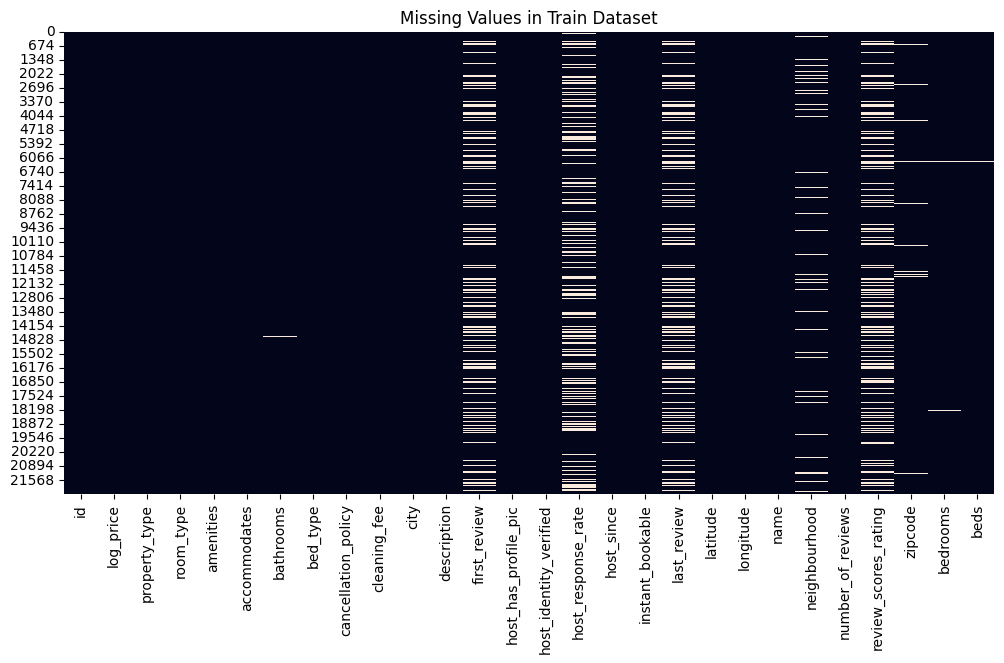

In [608]:
# Highlight missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df_train.isnull(), cbar=False)
plt.title('Missing Values in Train Dataset')
plt.show()

# plt.figure(figsize=(12, 6))
# sns.heatmap(df_train.isnull(), cbar=False)
# plt.title('Missing Values in Train Dataset')
# plt.show()

### Missing values 

In [609]:
#count of missing values in each column
missing_values_train = df_train.isnull().sum()
# missing_values_train = df_train.isnull().sum()
print("\nMissing Values in train Dataset:\n", missing_values_train[missing_values_train > 0])
# print("\nMissing Values in Train Dataset:\n", missing_values_train[missing_values_train > 0])
print("\nPercentage of Missing Values in train Dataset:\n", ((missing_values_train[missing_values_train > 0] / df_test.shape[0])*100).round(1))


Missing Values in train Dataset:
 bathrooms                   51
first_review              4725
host_has_profile_pic        56
host_identity_verified      56
host_response_rate        5475
host_since                  56
last_review               4716
neighbourhood             2086
review_scores_rating      4978
zipcode                    303
bedrooms                    26
beds                        35
dtype: int64

Percentage of Missing Values in train Dataset:
 bathrooms                  0.1
first_review               9.1
host_has_profile_pic       0.1
host_identity_verified     0.1
host_response_rate        10.6
host_since                 0.1
last_review                9.1
neighbourhood              4.0
review_scores_rating       9.6
zipcode                    0.6
bedrooms                   0.1
beds                       0.1
dtype: float64


In [610]:
#handling missing data by filling gaps with the most common values to preserve the distribution or unknown
df_train = df_train.fillna({
    'bathrooms': df_train['bathrooms'].median(),
    'bedrooms': df_train['bedrooms'].median(),
    'beds': df_train['beds'].median(),
    'neighbourhood': 'Unknown', 
    'zipcode': 'Unknown',
    })

#for the rest of the columns
df_train = df_train.fillna(np.nan)

df_test = df_test.fillna({
    'bathrooms': df_test['bathrooms'].median(),
    'bedrooms': df_test['bedrooms'].median(),
    'beds': df_test['beds'].median(),
    'neighbourhood': 'Unknown', 
    'zipcode': 'Unknown',
    })
df_test = df_test.fillna(np.nan)

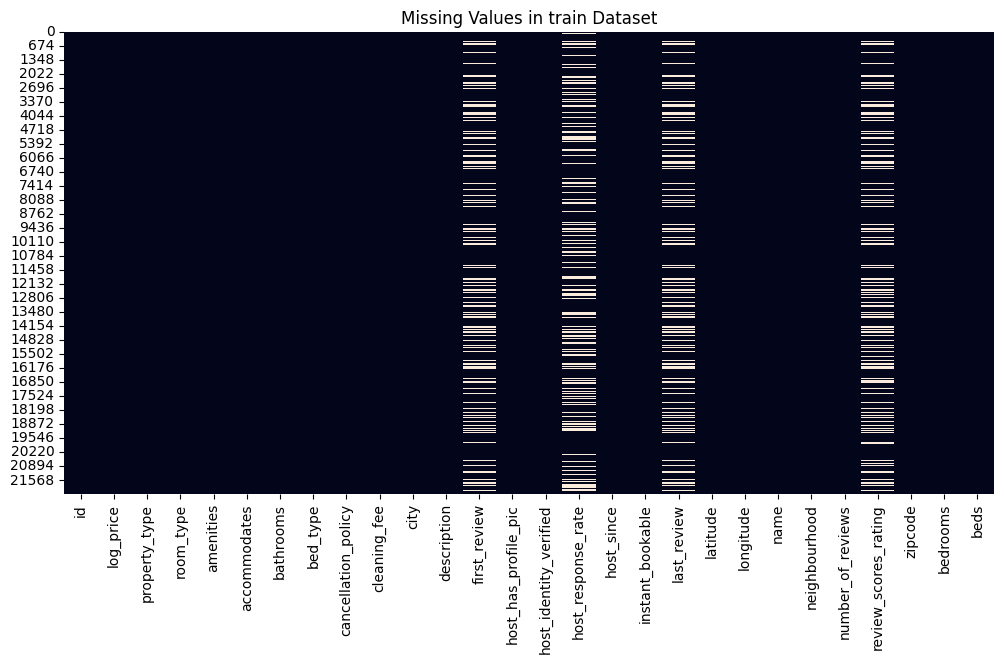


Missing Values in train Dataset:
 first_review              4725
host_has_profile_pic        56
host_identity_verified      56
host_response_rate        5475
host_since                  56
last_review               4716
review_scores_rating      4978
dtype: int64

Percentage of Missing Values in train Dataset:
 first_review              21.3
host_has_profile_pic       0.3
host_identity_verified     0.3
host_response_rate        24.6
host_since                 0.3
last_review               21.2
review_scores_rating      22.4
dtype: float64

df train Shape : 22234 lines


In [611]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_train.isnull(), cbar=False)
plt.title('Missing Values in train Dataset')
plt.show()

missing_values_train = df_train.isnull().sum()
print("\nMissing Values in train Dataset:\n", missing_values_train[missing_values_train > 0])
print("\nPercentage of Missing Values in train Dataset:\n", ((missing_values_train[missing_values_train > 0] / df_train.shape[0])*100).round(1))
print("\ndf train Shape :", df_train.shape[0], "lines")

### Outliers and distrbution

In [612]:
# numerical_cols_all = df_train.select_dtypes(include=['int64', 'float64']).columns
# print("\nNumerical Columns in train Dataset:\n", numerical_cols_all, numerical_cols_all.shape)
numerical_cols_all = ['log_price', 'accommodates', 'bathrooms', 'cleaning_fee', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'instant_bookable', 'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']

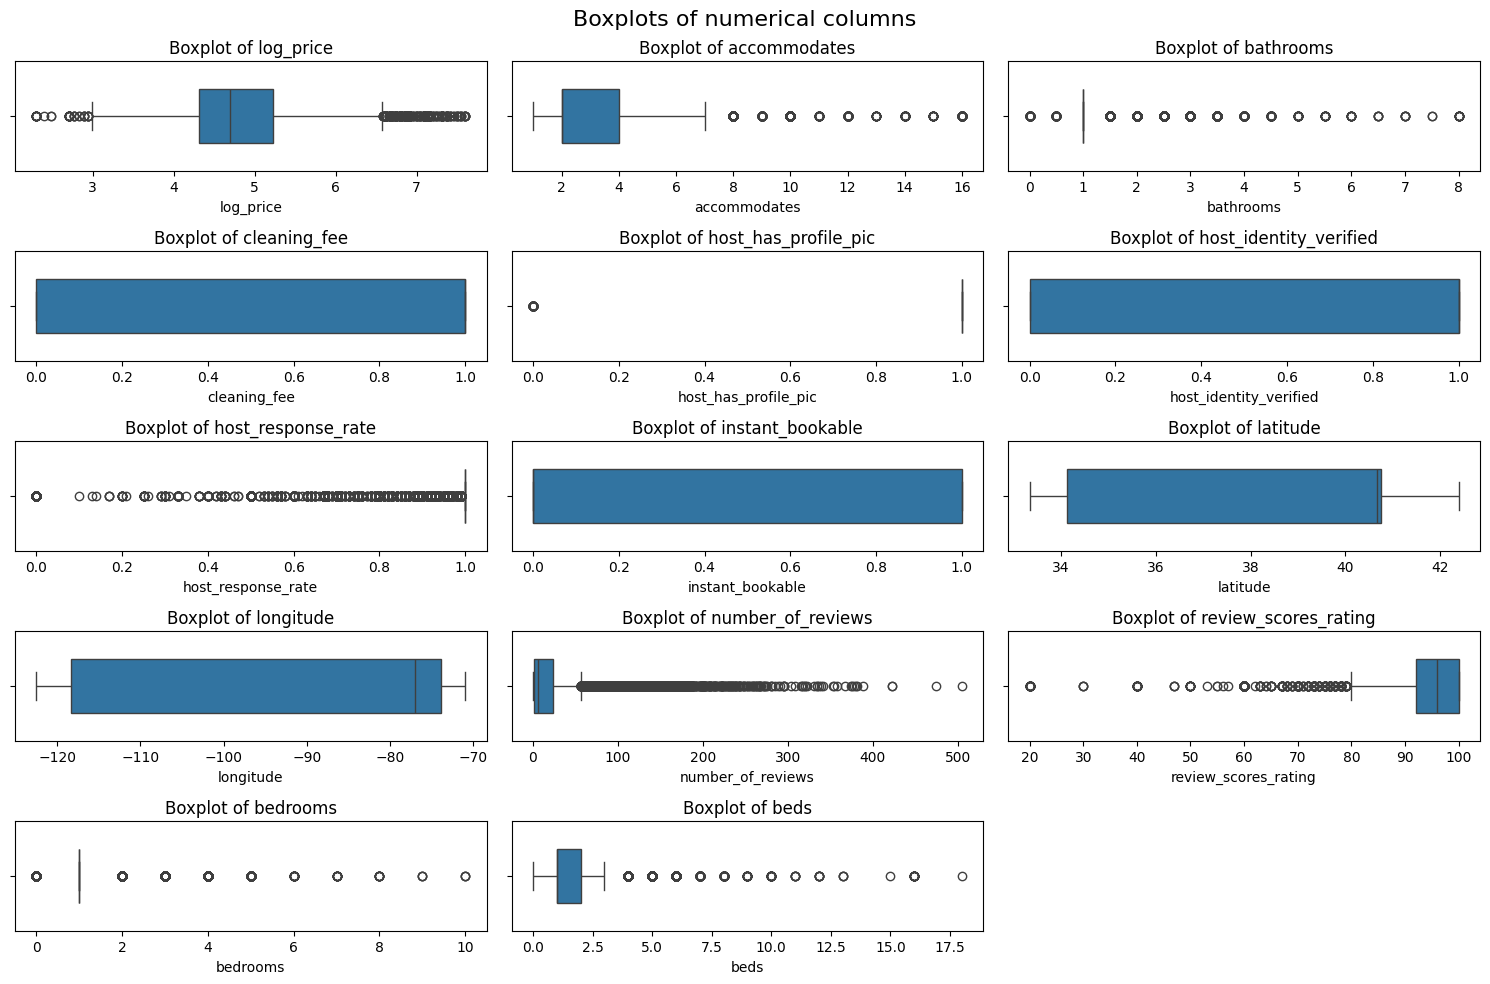


Minimum and Maximum Values in numerical data of train Dataset:
accommodates - Min: 1, Max: 16
bathrooms - Min: 0.0, Max: 8.0
number_of_reviews - Min: 0, Max: 505
review_scores_rating - Min: 20.0, Max: 100.0
bedrooms - Min: 0.0, Max: 10.0
beds - Min: 0.0, Max: 18.0


In [613]:
# Outliers in numerical columns
# numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = df_train[[ 'accommodates', 'bathrooms', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']]
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_all, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=df_train[col],width=0.5)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    
plt.suptitle('Boxplots of numerical columns', fontsize=16)
plt.tight_layout()


plt.show()

#minimum and maximum values
print("\nMinimum and Maximum Values in numerical data of train Dataset:")
for col in numerical_cols:
    print(f"{col} - Min: {df_train[col].min()}, Max: {df_train[col].max()}")

there seems to be outliers visible in the boxplot, and ranges

In [614]:
#Handling Outliers in numerical columns using the IQR method and by capping them
n_cols = df_train[[ 'accommodates', 'number_of_reviews', 'review_scores_rating', 'bedrooms']]
for col in n_cols:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap outliers
    df_train[col] = np.where(df_train[col] < lower_bound, lower_bound,np.where(df_train[col] > upper_bound, upper_bound, df_train[col]))

for col in n_cols:
    Q1 = df_test[col].quantile(0.25)
    Q3 = df_test[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap outliers
    df_test[col] = np.where(df_test[col] < lower_bound, lower_bound,np.where(df_test[col] > upper_bound, upper_bound, df_test[col]))


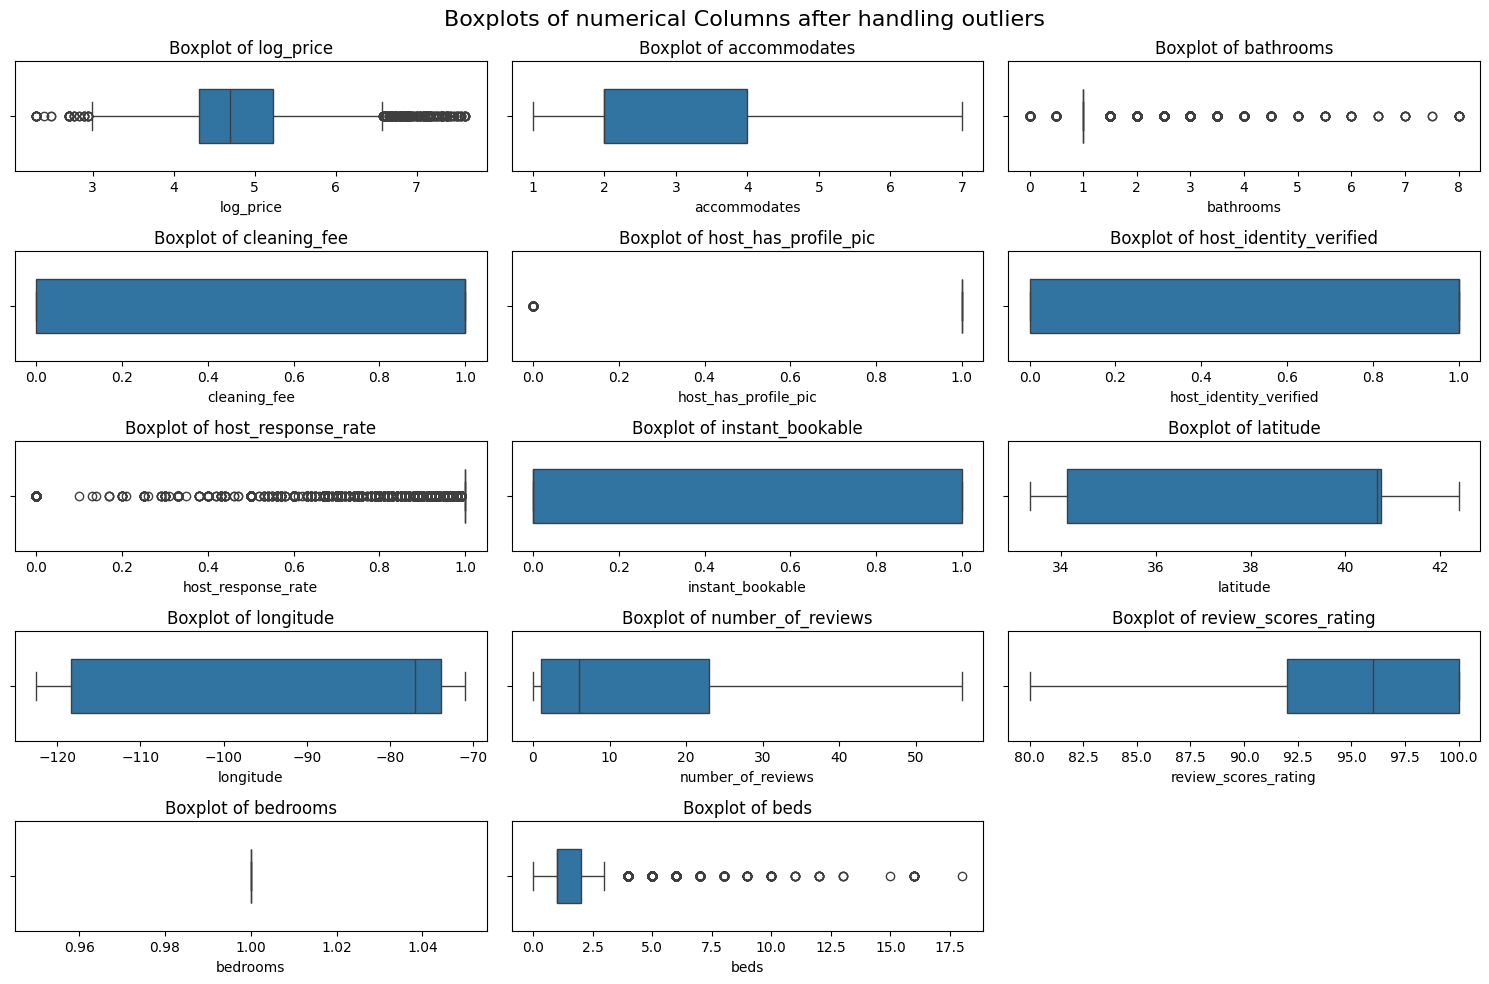


Minimum and Maximum Values in numerical data oftrain Dataset:
log_price - Min: 2.302585092994046, Max: 7.6004023345004
accommodates - Min: 1.0, Max: 7.0
bathrooms - Min: 0.0, Max: 8.0
cleaning_fee - Min: 0, Max: 1
host_has_profile_pic - Min: 0.0, Max: 1.0
host_identity_verified - Min: 0.0, Max: 1.0
host_response_rate - Min: 0.0, Max: 1.0
instant_bookable - Min: 0, Max: 1
latitude - Min: 33.339001876106906, Max: 42.390247544263616
longitude - Min: -122.51094046823688, Max: -70.98935852685811
number_of_reviews - Min: 0.0, Max: 56.0
review_scores_rating - Min: 80.0, Max: 100.0
bedrooms - Min: 1.0, Max: 1.0
beds - Min: 0.0, Max: 18.0


In [615]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_all, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=df_train[col],width=0.5)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.suptitle('Boxplots of numerical Columns after handling outliers', fontsize=16)
plt.tight_layout()
plt.show()

#minimum and maximum values
print("\nMinimum and Maximum Values in numerical data oftrain Dataset:")
for col in numerical_cols_all:
    print(f"{col} - Min: {df_train[col].min()}, Max: {df_train[col].max()}")

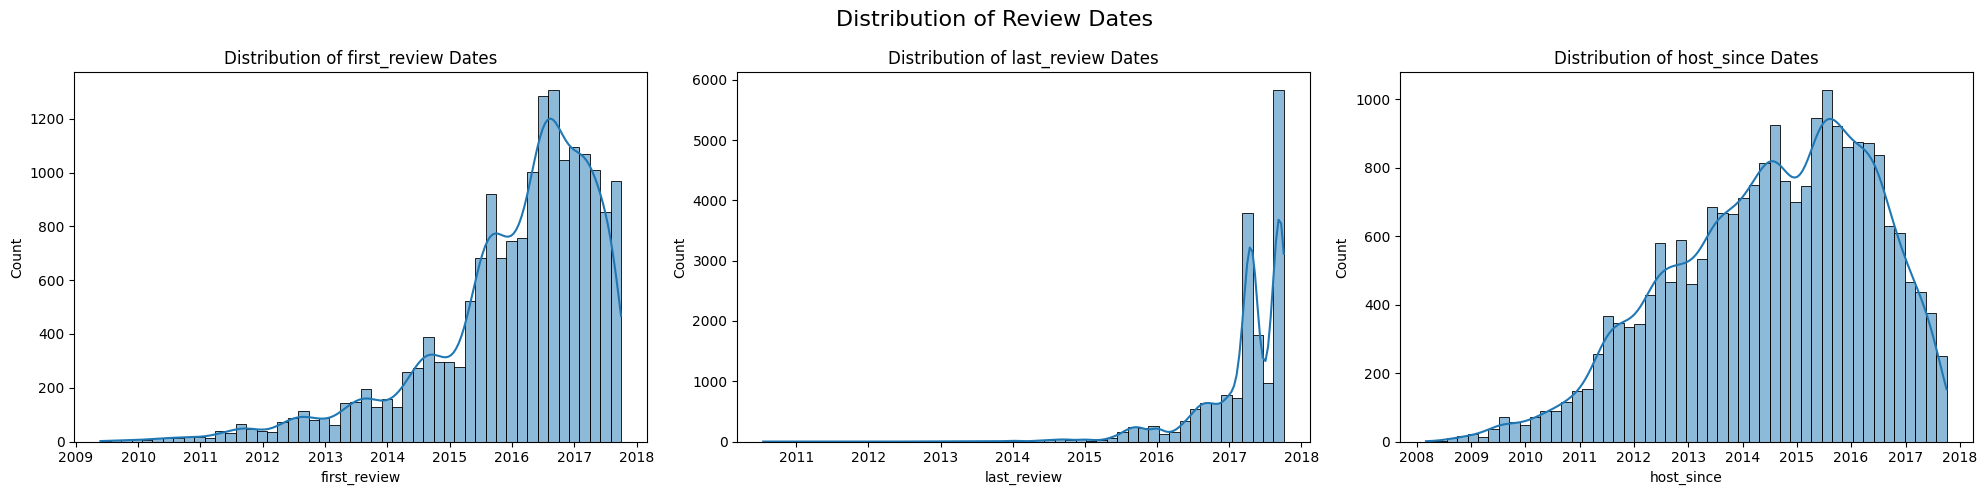


First Review Date Range: 2009-05-25 00:00:00 to 2017-10-02 00:00:00
Last Review Date Range: 2010-07-17 00:00:00 to 2017-10-05 00:00:00
Host Since Date Range: 2008-03-03 00:00:00 to 2017-10-04 00:00:00


In [616]:
#Outliers in dates columns

# Visualize distributions
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.suptitle('Distribution of Review Dates', fontsize=16)

sns.histplot(df_train['first_review'].dropna(), bins=50, kde=True)
plt.title('Distribution of first_review Dates')

plt.subplot(1, 3, 2)
sns.histplot(df_train['last_review'].dropna(), bins=50, kde=True)
plt.title('Distribution of last_review Dates')

plt.subplot(1, 3, 3)
sns.histplot(df_train['host_since'].dropna(), bins=50, kde=True)
plt.title('Distribution of host_since Dates')

plt.tight_layout()
plt.show()

#check range of dates
print("\nFirst Review Date Range:", df_train['first_review'].min(), "to", df_train['first_review'].max())
print("Last Review Date Range:", df_train['last_review'].min(), "to", df_train['last_review'].max())
print("Host Since Date Range:", df_train['host_since'].min(), "to", df_train['host_since'].max())

Dates are within an acceptable range based on this context of reviews (no outliers detected)


Range de prix train Dataset: 10.0 to 1999.0

Prix median: 110.0


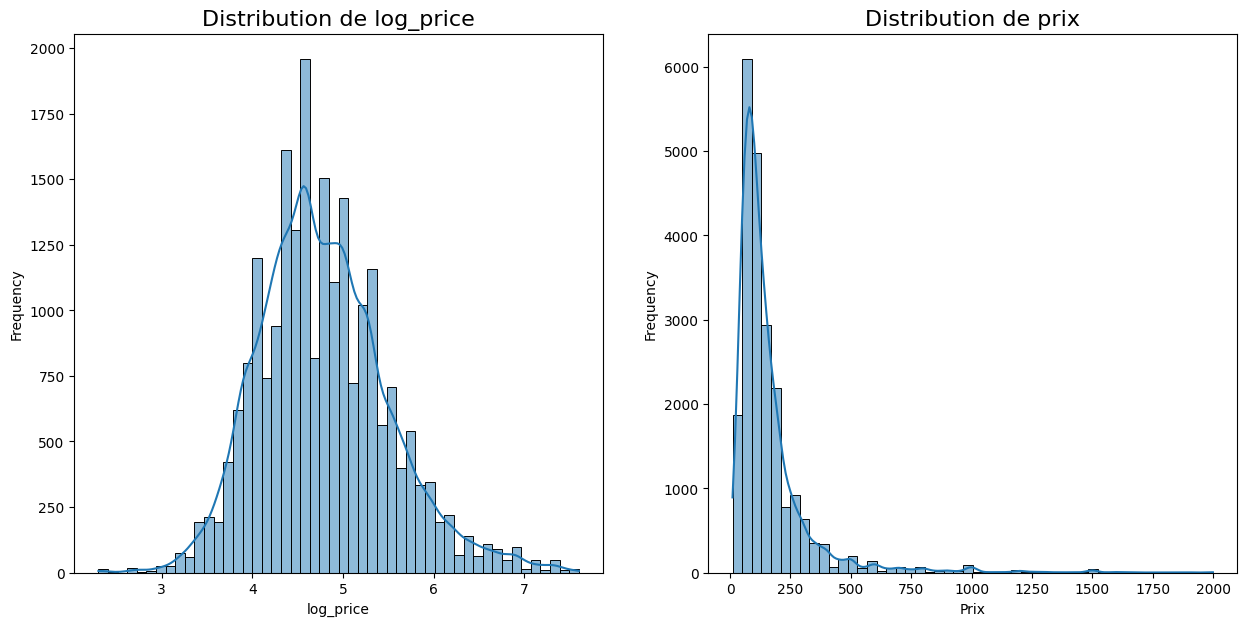

In [617]:
#distribution target data
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.histplot(df_train['log_price'], bins=50, kde=True, edgecolor='black')
plt.title('Distribution de log_price', fontsize=16)
plt.xlabel('log_price')
plt.ylabel('Frequency')

# Convert log_price to understandable price
price = np.exp(df_train['log_price'])
plt.subplot(1, 2, 2)
sns.histplot(price, bins=50, kde=True, edgecolor='black')
plt.title('Distribution de prix', fontsize=16)
plt.xlabel('Prix')
plt.ylabel('Frequency')

#rnage of log_price
print("\nRange de prix train Dataset:", price.min().round(2), "to", price.max().round(2))
print("\nPrix median:",price.median().round(2))

### Correlations

In [618]:
# #convert numerical columns to float
# for col in numerical_cols:
#     df_test[col] = df_test[col].astype(float)

In [619]:
df_train[numerical_cols_all].corr()

,log_price,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
log_price,1.000000,0.588950,0.368856,0.115116,-0.013119,0.030501,-0.002562,-0.040482,0.005231,-0.045348,-0.039170,0.101517,NaN,0.435068
accommodates,0.588950,1.000000,0.457140,0.210425,-0.003974,0.069355,0.053367,0.065333,-0.064291,-0.080133,0.102730,-0.032513,NaN,0.759520
bathrooms,0.368856,0.457140,1.000000,0.049952,-0.010265,0.013149,0.005079,-0.006222,-0.124354,-0.126303,-0.045213,0.011128,NaN,0.536255
cleaning_fee,0.115116,0.210425,0.049952,1.000000,0.030423,0.162444,0.109433,0.015168,-0.045026,-0.051351,0.181034,0.016190,NaN,0.133647
host_has_profile_pic,-0.013119,-0.003974,-0.010265,0.030423,1.000000,0.077520,0.023075,-0.003021,0.000915,0.001489,0.031861,0.019163,NaN,-0.009749
host_identity_verified,0.030501,0.069355,0.013149,0.162444,0.077520,1.000000,0.075801,-0.081005,-0.034445,-0.049762,0.208991,0.034898,NaN,0.031672
host_response_rate,-0.002562,0.053367,0.005079,0.109433,0.023075,0.075801,1.000000,0.106787,0.017986,-0.002261,0.154493,0.088390,NaN,0.036840
instant_bookable,-0.040482,0.065333,-0.006222,0.015168,-0.003021,-0.081005,0.106787,1.000000,-0.009784,-0.003615,0.093450,-0.075110,NaN,0.059468
latitude,0.005231,-0.064291,-0.124354,-0.045026,0.000915,-0.034445,0.017986,-0.009784,1.000000,0.895423,-0.007006,-0.038596,NaN,-0.069827
longitude,-0.045348,-0.080133,-0.126303,-0.051351,0.001489,-0.049762,-0.002261,-0.003615,0.895423,1.000000,-0.036106,-0.052305,NaN,-0.076897


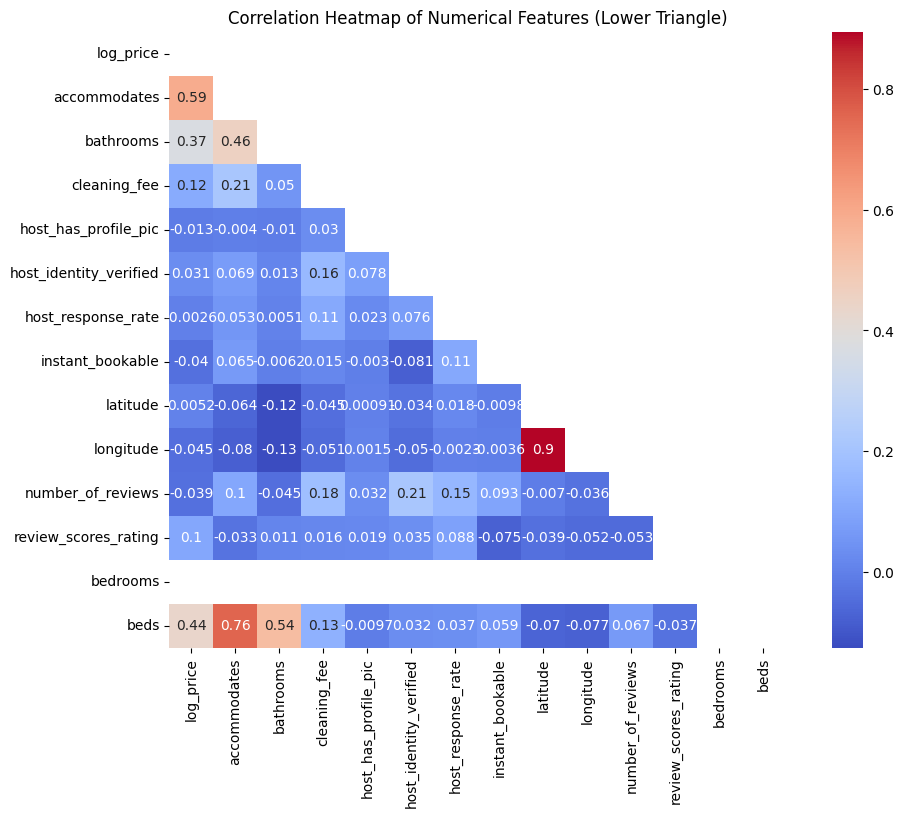

In [620]:
# Visualize correlations
# Correlation matrix
corr = df_train[numerical_cols_all].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features (Lower Triangle)')
plt.show()


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'NYC'),
  Text(1, 0, 'LA'),
  Text(2, 0, 'SF'),
  Text(3, 0, 'DC'),
  Text(4, 0, 'Chicago'),
  Text(5, 0, 'Boston')])

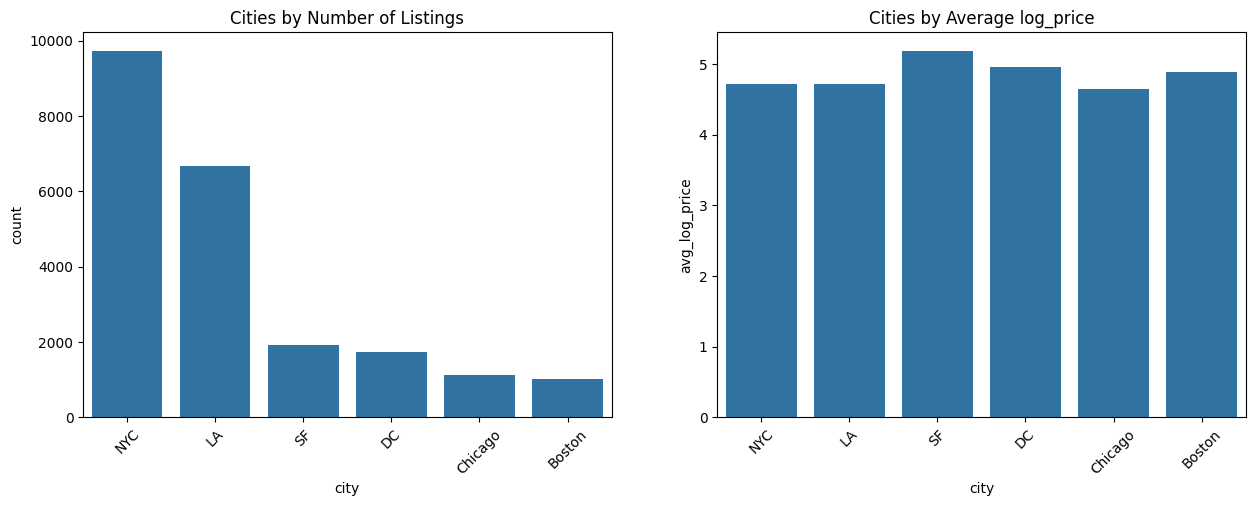

In [621]:
#non numerical columns
plt.figure(figsize=(15, 5))

city = df_train.groupby('city').agg({'log_price': ['mean', 'count']}).round(2)
city.columns = ['avg_log_price', 'count']
city = city.sort_values('count', ascending=False)

plt.subplot(1, 2, 1)
sns.barplot(x=city.index, y=city['count'])
plt.title('Cities by Number of Listings')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=city.index, y=city['avg_log_price'])
plt.title('Cities by Average log_price')
plt.xticks(rotation=45)

## Feature selection and preprocessing choices 

In [622]:
df = df_train.copy()
dft = df_test.copy()

#### Features selection

In [623]:
#dates, host response rate, numerical features 
date_cols = ['first_review', 'last_review', 'host_since']
#calculs for date types features
df['days_first_review'] = (df['last_review'].max() - df['first_review']).dt.days
df['days_since_last_review'] =(df['last_review'].max() - df['last_review']).dt.days
df['days_as_host'] = (df['last_review'].max() - df['host_since']).dt.days
#amenities features
df['amenity_count'] = df['amenities'].apply(lambda x: len(x.split(',')) if pd.notna(x) else 0)
amenities= ['Wireless Internet', 'Kitchen', 'Heating', 'Essentials','Air Conditioning', 'Washer', 'Dryer', 'Shampoo', 'Cable TV', 'Free Parking on Premises']

for amenity in amenities:
    col = f'has_{amenity.lower().replace(" ", "_")}'
    df[col] = df['amenities'].apply(lambda x: 1 if pd.notna(x) and amenity in x else 0)

#bed berooms features
df['accommodates_bedroom'] = df['accommodates'] / (df['bedrooms'] + 0.1)
#bathroom features
df['bathroom_accommodates'] = df['bathrooms'] / (df['accommodates'] + 0.1)
#review features
df['has_reviews'] = (df['number_of_reviews'] > 0).astype(int)

print(df.columns)
print(df.shape)

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'zipcode', 'bedrooms', 'beds',
       'days_first_review', 'days_since_last_review', 'days_as_host',
       'amenity_count', 'has_wireless_internet', 'has_kitchen', 'has_heating',
       'has_essentials', 'has_air_conditioning', 'has_washer', 'has_dryer',
       'has_shampoo', 'has_cable_tv', 'has_free_parking_on_premises',
       'accommodates_bedroom', 'bathroom_accommodates', 'has_reviews'],
      dtype='object')
(22234, 45)


In [624]:
#calculs for date types features
dft['days_first_review'] = (dft['last_review'].max() - dft['first_review']).dt.days
dft['days_since_last_review'] =(dft['last_review'].max() - dft['last_review']).dt.days
dft['days_as_host'] = (dft['last_review'].max() - dft['host_since']).dt.days
#amenities features
dft['amenity_count'] = dft['amenities'].apply(lambda x: len(x.split(',')) if pd.notna(x) else 0)
amenities= ['Wireless Internet', 'Kitchen', 'Heating', 'Essentials','Air Conditioning', 'Washer', 'Dryer', 'Shampoo', 'Cable TV', 'Free Parking on Premises']

for amenity in amenities:
    col = f'has_{amenity.lower().replace(" ", "_")}'
    dft[col] = dft['amenities'].apply(lambda x: 1 if pd.notna(x) and amenity in x else 0)

#bed berooms features
dft['accommodates_bedroom'] = dft['accommodates'] / (dft['bedrooms'] + 0.1)
#bathroom features
dft['bathroom_accommodates'] = dft['bathrooms'] / (dft['accommodates'] + 0.1)
#review features
dft['has_reviews'] = (dft['number_of_reviews'] > 0).astype(int)

# print(dft.columns)
# print(dft.shape)

In [ ]:
#select features for preprocessing
features = ['days_first_review', 'days_since_last_review', 'days_as_host',
            'host_has_profile_pic', 'host_identity_verified', 'instant_bookable',
            'cleaning_fee', 'host_response_rate', 'latitude', 'longitude',
            'accommodates', 'bathrooms', 'number_of_reviews',
            'review_scores_rating', 'bedrooms', 'beds',
            'amenity_count', 'has_wireless_internet', 'has_kitchen', 
            'has_heating', 'has_essentials', 'has_air_conditioning',
            'has_washer', 'has_dryer', 'has_shampoo', 'has_cable_tv', 
            'has_free_parking_on_premises', 'accommodates_bedroom', 
            'bathroom_accommodates', 'has_reviews', 'property_type', 
            'room_type', 'bed_type','cancellation_policy','city', 'neighbourhood']

target = 'log_price'

X = df[features]
y = df[target]

# X_test = dft[features]
# X.columns.shape[0]

36

## 2. Prediction

experimentation with different preprocessing pipelines:
- Encoding
- Scaling/normalization
- Feature engineering

In [637]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [633]:
#preprocessing pipeline
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#select categorical features  
categorical_features = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city', 'neighbourhood']
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

Try multiple ML models:
- Linear Regression
- Decision Trees
- Random Forests
- XGBoost

And rigorous model evaluation:
  - Train/test split, cross-validation
  - Compare models with clear metrics (e.g., RMSE)

In [643]:
# pipeline and models
reg_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
reg_pipeline.fit(X_train, y_train)
y_pred = reg_pipeline.predict(X_test)

# Evaluate regression metrics
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

#save the trained pipeline
joblib.dump(reg_pipeline, 'airbnb_regression_model.pkl')

RMSE: 0.4301172566097849
R2 Score: 0.6388777106622991


['airbnb_regression_model.pkl']

In [639]:
from sklearn.tree import DecisionTreeRegressor

#decision tree model
reg_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
reg_pipeline.fit(X_train, y_train)
y_pred = reg_pipeline.predict(X_test)

# Evaluate regression metrics
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

# Save the trained pipeline
joblib.dump(reg_pipeline, 'airbnb_decision_tree_model.pkl')

RMSE: 0.5829063967471487
R2 Score: 0.33674855745518073


['airbnb_decision_tree_model.pkl']

In [641]:
# from sklearn.ensemble import RandomForestRegressor

# # random forest model
# reg_pipeline = Pipeline([
#     ('preprocessing', preprocessor),
#     ('regressor', RandomForestRegressor(random_state=42))
# ])

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit the model
# reg_pipeline.fit(X_train, y_train)
# y_pred = reg_pipeline.predict(X_test)

# # Evaluate metrics
# print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# print("R2 Score:", r2_score(y_test, y_pred))

# # Save the trained pipeline
# joblib.dump(reg_pipeline, 'airbnb_random_forest_model.pkl')

In [ ]:
from xgboost import XGBRegressor

# XGBoost regression model
reg_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', XGBRegressor(random_state=42, n_jobs=-1, verbosity=1))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
reg_pipeline.fit(X_train, y_train)
y_pred = reg_pipeline.predict(X_test)

# Evaluate metrics
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

# Save the trained pipeline
# joblib.dump(reg_pipeline, 'airbnb_xgboost_model.pkl')

RMSE: 0.684573967471487
R2 Score: 0.36872055745518073 

['airbnb_xgboost_model.pkl']



## Prediction

In [664]:

best_model = reg_pipeline
best_model.fit(X_train, y_train)
#predictions ensemble test
test_pred = best_model.predict(X_test)

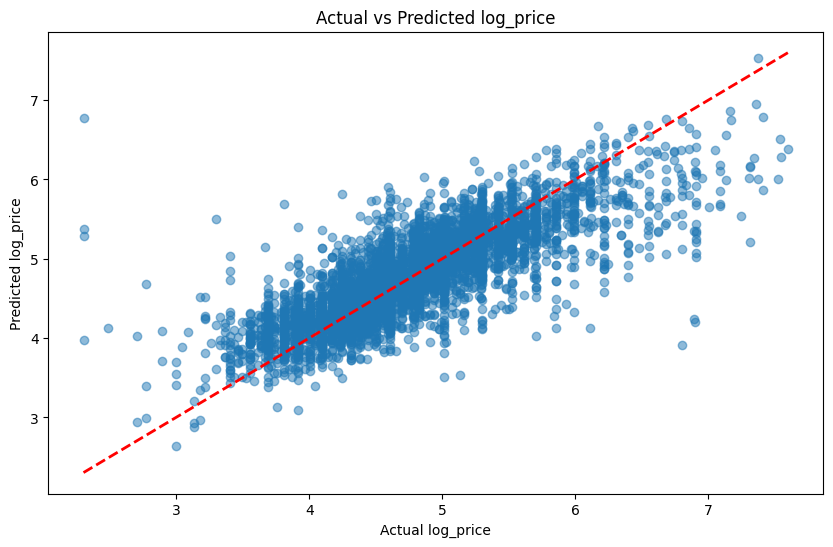

In [ ]:
#visualize comparison of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual log_price') 
plt.ylabel('Predicted log_price')
plt.title('Actual vs Predicted log_price')
plt.show()

# Save the trained model
joblib.dump(best_model, 'airbnb_best_model.pkl')

### Fichier pour le rendu 

In [ ]:
# Generate predictions for the actual test set
test_pred_full = best_model.predict(dft[features])
rendu = pd.DataFrame({'id': dft["Unnamed: 0"], 'logpred': test_pred_full})

# Save to CSV
rendu.to_csv('prediction.csv', index=False)
# rendu.shape
rendu.head()

,id,logpred
0,14282777,5.131159
1,17029381,5.725081
2,7824740,5.120573
3,19811650,5.741870
4,12410741,4.541415
